In [15]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
import numpy as np
from scipy.stats import gaussian_kde

In [16]:
#import dataframe
album_df = pd.read_pickle('data/album_df.pkl')

In [17]:
album_df.head()

,album_run_time_ms,number_of_tracks,std_in_energy,std_in_speechiness,danceability_mean,acousticness_mean,instrumentalness_mean,loudness_mean,tempo_mean,energy_amax,...,valence_amax,tempo_amax,time_signature_amax,popularity_amax,score_amax,num_markets_amax,is_explicit_amax,mode_amax,key_amax,genre
02o1jXAin1PmiYxmln4WnE,1685371.0,10.0,0.210706,0.009939,0.418500,0.080014,0.000862,-5.421200,138.344600,0.915,...,0.932,175.951,4,9.0,6.8,79,False,1.0,11.0,rock
02sEJTj1sye1JaqxqpcSCp,3143823.0,14.0,0.161621,0.045708,0.601786,0.120152,0.076961,-4.511929,121.551643,0.939,...,0.467,169.987,4,80.0,5.3,76,True,1.0,11.0,electronic
03CgI5yzuOcyRkkDOyCazP,1998917.0,11.0,0.123559,0.157071,0.417545,0.122944,0.315466,-8.302364,120.664545,0.855,...,0.620,196.424,4,50.0,6.8,78,False,1.0,11.0,electronic
05vg15zAZuJneWQucqWaIa,1740996.0,10.0,0.053382,0.071112,0.372300,0.000115,0.111160,-4.257100,128.057000,0.943,...,0.713,197.282,4,7.0,6.7,79,False,1.0,11.0,rock
06qL01wLa4kVWGloqSHDYD,1487559.0,10.0,0.104159,0.024700,0.231700,0.000754,0.775900,-6.111300,117.426500,0.979,...,0.499,155.459,4,7.0,7.0,79,True,1.0,11.0,rock


In [18]:
album_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 551 entries, 02o1jXAin1PmiYxmln4WnE to 7xf6mmYeYnTHjPFR0BeIre
Data columns (total 22 columns):
album_run_time_ms        551 non-null float64
number_of_tracks         551 non-null float64
std_in_energy            550 non-null float64
std_in_speechiness       550 non-null float64
danceability_mean        551 non-null float64
acousticness_mean        551 non-null float64
instrumentalness_mean    551 non-null float64
loudness_mean            551 non-null float64
tempo_mean               551 non-null float64
energy_amax              551 non-null float64
liveness_amax            551 non-null float64
speechiness_amax         551 non-null float64
valence_amax             551 non-null float64
tempo_amax               551 non-null float64
time_signature_amax      551 non-null int64
popularity_amax          551 non-null float64
score_amax               551 non-null float64
num_markets_amax         551 non-null int64
is_explicit_amax         551 non-nul

## EDA Questions

1. What is the pitchfork rating distribution?
2. What are the most commonly reviewed genres?
3. How many songs are there per album?
4. reviews vs. popularity
5. highest rated genres

### 1. What is the pitchfork rating distribution?

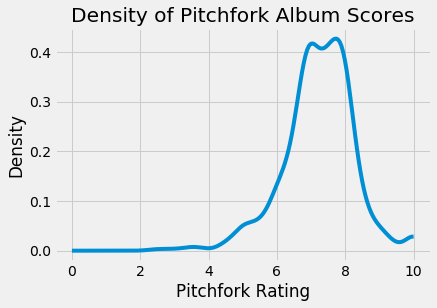

In [21]:
#plotting rating density
density = gaussian_kde(album_df['score_amax'])
xs = np.linspace(0,10,200)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs))
plt.ylabel('Density')
plt.xlabel('Pitchfork Rating')
plt.title('Density of Pitchfork Album Scores')
plt.show()

In [9]:
album_df['score_amax'].mean()

7.225952813067153

In [11]:
len(album_df[album_df['score_amax'] >= 9])

22

In [12]:
len(album_df[album_df['score_amax'] == 10])

10

It appears that Pitchfork tends to rate most albums between 6-8 out of 10 with around 60% of their ratings around 7.5. The average rating for an album is 7.22 and they have only rated 22 albums above 9, 10 of those albums being scored a 10. It is important to note that this is only a subset of pitchforks reviews thus the true distributions would require more data. 

### 2. What are the most commonly reviewed genres?

In [13]:
album_df.genre.value_counts()

rock            218
electronic      104
rap              67
pop/r&b          48
experimental     42
folk/country     28
metal            21
jazz             16
global            7
Name: genre, dtype: int64

In [14]:
s = album_df.genre.value_counts()

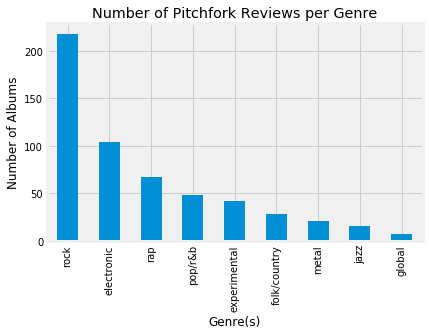

In [15]:
#plot bar chart of reviews per music genre
s.plot.bar()
plt.ylabel('Number of Albums')
plt.xlabel('Genre(s)')
plt.title('Number of Pitchfork Reviews per Genre')
plt.show()

It appears that Pitchfork tends to review Rock, Rap, Electronic, and Pop/R&B mostly. Their most commonly reviewed genre is Rock (218 reviews) which makes sense as they were born as an indie music review website and Indie Rock was the original indie music originating in the 1970's.

### 3. How many songs are there per album?

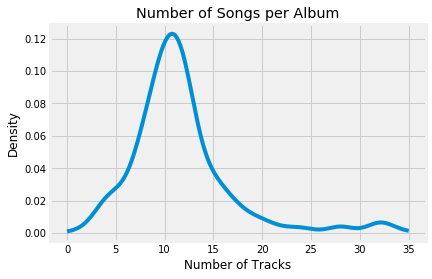

In [16]:
density2 = gaussian_kde(album_df['number_of_tracks'])
xs2 = np.linspace(0,35,200)
density2.covariance_factor = lambda : .25
density2._compute_covariance()
plt.plot(xs2,density2(xs2))
plt.ylabel('Density')
plt.xlabel('Number of Tracks')
plt.title('Number of Songs per Album')
plt.show()

In [17]:
album_df['number_of_tracks'].max()

35.0

In [18]:
album_df['number_of_tracks'].mean()

11.651542649727768

From this visualization you can see that most albums have around 8-15 tracks. The maximum number of tracks is 35 and the average is 11.

### 4. What is the distribution of explicitness?

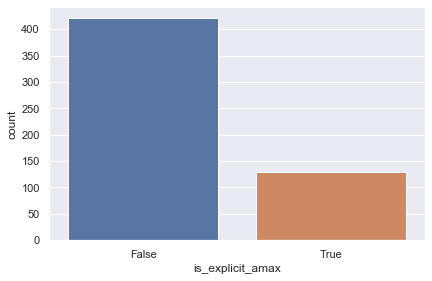

In [24]:
#plot histogram of explicit albums
sns.set(style="darkgrid")
ax = sns.countplot(x="is_explicit_amax", data=album_df)

From this plot, it is evident that most albums reviewed by pitchfork have no explicit lyrics and the next largest category is all explicit lyrics. It seems that albums tend to either be completely explicity or have no explicit lyrics.